In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

# Common code for display result
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

In [6]:
# zori_zip = pd.read_csv('./Zillow_Data_direct/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

# zip_county = pd.read_csv('https://raw.githubusercontent.com/scpike/us-state-county-zip/master/geo-data.csv')
# zip_county

In [8]:
# us_zips = pd.read_csv('uszips.csv')
# us_zips = us_zips[['zip', 'city', 'state_id', 'state_name','county_fips', 'county_name','county_names_all', 'county_fips_all']]

In [4]:
def fix_zip(series):
      return series.astype(str).str.replace('[^\w\s]', '').str.zfill(5)
#us_zips['fixed_zip'] = fix_zip(us_zips['zip'])

In [5]:
# pvt_tbl = zori_zip.pivot_table(columns='RegionName').drop(['RegionID','SizeRank'],axis=0)
# sorted(list(zip(pvt_tbl.columns,pvt_tbl.isnull().sum()/len(pvt_tbl))),key=lambda t:t[1],reverse=True)

In [6]:
mostly_clean_zori=pd.read_csv('./mostly_clean_zori.csv')
mostly_clean_zori.head(2)

,RegionName,Yr_Mo,RI,Year,Month,CountyName,zip_mean,zip_std,Outlier_High,Outlier_Low
0,10025,2014-01,2883.0,2014,1,New York County,2951.25,112.279389,False,False
1,10025,2014-02,2895.0,2014,2,New York County,2951.25,112.279389,False,False


In [7]:
#mostly_clean_zori[['RegionName','Yr_Mo','RI']]
mostly_clean_zori['RegionName']=fix_zip(mostly_clean_zori['RegionName'])
#mostly_clean_zori['RegionName']
pvt_tbl = mostly_clean_zori[['RegionName','Yr_Mo','RI']].pivot_table(columns='RegionName',values='RI',index='Yr_Mo',)

pvt_tbl.reset_index(inplace=True)
#pvt_tbl

In [8]:
train_lst = list(pvt_tbl['Yr_Mo'][:-17])
train_df = pvt_tbl[pvt_tbl['Yr_Mo'].isin(train_lst)]
train_df.set_index('Yr_Mo',drop=True,inplace=True)
test_df = pvt_tbl[~pvt_tbl['Yr_Mo'].isin(train_lst)]
test_df.set_index('Yr_Mo',drop=True,inplace=True)

#train_df
#test_df

In [9]:
xc = train_df[['10025','01603']]
yc = test_df[['10025','01603']]

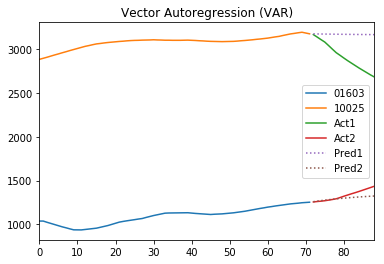

,Pred1,Pred2,Act1,Act2
0,3173.246266,1259.441104,3165.0,1256.000000
1,3172.525967,1265.512112,3137.0,1261.000000
2,3171.837670,1271.233198,3108.0,1265.000000
3,3171.180004,1276.623478,3080.0,1270.000000
4,3170.551652,1281.701069,3040.0,1277.000000
5,3169.951352,1286.483131,2999.0,1284.000000
6,3169.377895,1290.985924,2959.0,1292.000000
7,3168.830121,1295.224850,2929.0,1306.000000
8,3168.306917,1299.214495,2898.0,1321.000000
9,3167.807218,1302.968674,2868.0,1335.000000


In [13]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({"Pred1":[x[0] for x in yhat], "Pred2":[x[1] for x in yhat], 
                      "Act1":test["10025"].values, "Act2":test["01603"].values})
#     res=pd.DataFrame({**{'Pred'+str(test.columns[i]):x[i] for x in yhat for i in range(len(x))},
#                       **test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns}).to_dict})
    return res

# df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
# df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(xc, yc)
show_graph(xc, df_ret, "Vector Autoregression (VAR)")

df_ret